In [2]:
#make heterostructure
#%%
#Import a lot of stuff
import numpy as np
import matplotlib.pyplot as plt
from qeh import make_heterostructure, Heterostructure
from default_parameters import get_thickness, get_intermass
import ase.units

Hartree = ase.units.Hartree#Hartree energy
Bohr = ase.units.Bohr#Bohr radius

# Choose number of padding layers.
# Can experiment with and without encapsulating (padding) in BN
nPadding=3
#Choose ndoped material and pdoped
#e_layer_formula='H-MoS2'
#h_layer_formula='H-MoSe2'
e_layer_formula='H-MoS2'
h_layer_formula='H-WSe2'
#layer thicknesses from the middle of one layer to another
d_BN = get_thickness('BN')  # hBN-hBN distance#3.22 før
d_MoS2 = get_thickness(e_layer_formula)
d_MoS2_BN = (d_BN+d_MoS2)/2  # MoS2-hBN distance
d_WSe2 = get_thickness(h_layer_formula)
d_WSe2_BN = (d_BN+d_WSe2)/2  # WSe2-hBN distance
#list of layer thicknesses
d= [d_BN]*(nPadding-1) + [d_MoS2_BN]*2 + [d_BN]*(3-1) + [d_WSe2_BN]*2 + [d_BN]*(nPadding-1)
#layers
layers = ['{}BN'.format(nPadding), e_layer_formula, '3BN', h_layer_formula, '{}BN'.format(nPadding)]

# hs = make_heterostructure(layers) #could be used. We choose to input some parameters ourselves to get a feeling for what is going on
hs = Heterostructure(structure=layers,  # set up structure
                        d=d,                         # layer distance array
                        include_dipole=True,
                        wmax=0,                      # only include \omega=0
                        qmax=1,                      # q grid up to 1 Ang^{-1}
                        d0=0)                     # width of single layer (only used for monolayer calculation), so currently set to 0


Calculating full chi
10.0%
20.0%
30.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
90.0%


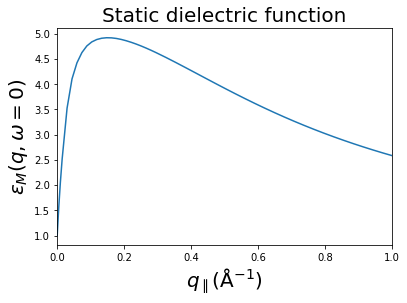

In [3]:
# %%
# # Get Macroscropic Dielectric function - this is a test that things look reasonable
q, w, epsM = hs.get_macroscopic_dielectric_function()
# # plot
plt.plot(q, epsM.real)
plt.xlim(0, 1)
plt.xlabel(r'$q_\parallel (\mathrm{\AA^{-1}}$)', fontsize=20)
plt.ylabel(r'$\epsilon_M(q, \omega=0)$', fontsize=20)
plt.title('Static dielectric function', fontsize=20)
plt.savefig('./plots/eps_vdWH_{}_{}.svg'.format(e_layer_formula[2:],h_layer_formula[2:]))
plt.show()

Calculating full chi
10.0%
20.0%
30.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
90.0%
Calculating full chi
10.0%
20.0%
30.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
90.0%


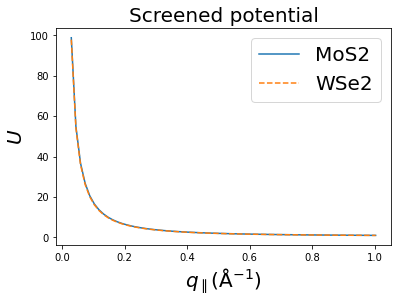

In [4]:
# %%
# Calculate screened potential W(q, \omega)
W_MoS2 = hs.get_screened_potential(layer=nPadding)
W_WSe2 = hs.get_screened_potential(layer=nPadding+4)
q = hs.q_abs / Bohr # get q-array (momentum transfer range) in Ångstrom.
indexQ_start=4
# plot together
plt.plot(q[indexQ_start:], W_MoS2[indexQ_start:,].real)
plt.plot(q[indexQ_start:], W_WSe2[indexQ_start:,].real,'--')
# plt.xlim(0, 1)
plt.xlabel(r'$q_\parallel (\mathrm{\AA^{-1}}$)', fontsize=20)
plt.ylabel(r'$U}(q, \omega=0)$', fontsize=20)
plt.title('Screened potential', fontsize=20)
plt.legend([e_layer_formula[2:],h_layer_formula[2:]], fontsize=20)
plt.savefig('./plots/VScr_vdWH_{}_{}.svg'.format(e_layer_formula[2:],h_layer_formula[2:]))
plt.show()
plt.close()

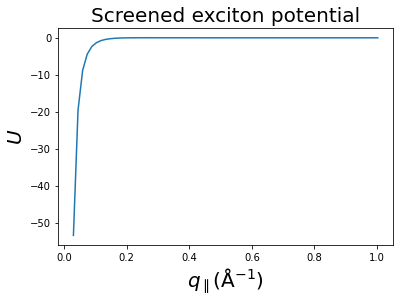

In [5]:
# %%
# Plot exciton screened potential
# 2*number of layers, first is spin up
# but no electrons in BN-layers
# consider single electron in n-doped layer
# consider single hole in p-dopedlayer
zeroPadding=np.zeros(2*nPadding)
hl_array = np.hstack([zeroPadding, np.array([1., 0.]), np.zeros(6), np.array([0., 0.]),zeroPadding ])
el_array = np.hstack([zeroPadding, np.array([0., 0.]), np.zeros(6), np.array([1., 0.]),zeroPadding ])

# Calculate exciton screened 
_,W_Exciton,_ = hs.get_exciton_screened_potential(e_distr=el_array, h_distr=hl_array)
#print(W_Exciton)
#plot
plt.plot(q[indexQ_start:], W_Exciton[indexQ_start:].real)
# plt.xlim(0, 1)
plt.xlabel(r'$q_\parallel (\mathrm{\AA^{-1}}$)', fontsize=20)
plt.ylabel(r'$U}(q, \omega=0)$', fontsize=20)
plt.title('Screened exciton potential', fontsize=20)
plt.savefig('./plots/VScr_Exciton_vdWH_{}_{}.svg'.format(e_layer_formula[2:],h_layer_formula[2:]))
plt.show()

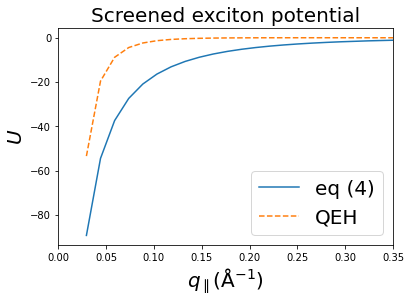

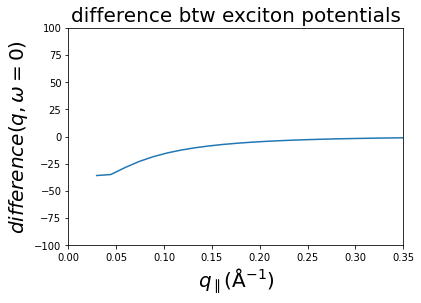

In [6]:
#we would like to plot eq (4) as well
indexQ_start=4
epsMqInv=np.array([1/(epsM[i]*q[i]) for i in range(len(q))])
VS=2*np.pi*epsMqInv
epsMqInv2=np.array([1/(2*q[i]) for i in range(len(q))])
VS2=2*np.pi*epsMqInv2
#print(np.shape(epsMqInv))
#print(np.shape(epsM))
#print(np.shape(VS))
VD=np.array([-VS2[i]*np.exp(-6*q[i]) for i in range(len(q))])
#plot together
plt.plot(q[indexQ_start:], VD[indexQ_start:].real)
plt.plot(q[indexQ_start:], W_Exciton[indexQ_start:].real,'--')
# plt.xlim(0, 1)
plt.xlabel(r'$q_\parallel (\mathrm{\AA^{-1}}$)', fontsize=20)
plt.ylabel(r'$U}(q, \omega=0)$', fontsize=20)
plt.title('Screened exciton potential', fontsize=20)
plt.xlim([0,0.35])
plt.legend(['eq (4)','QEH'], fontsize=20)
plt.savefig('./plots/VScr_Exciton_vs_eq4_vdWH_{}_{}.svg'.format(e_layer_formula[2:],h_layer_formula[2:]))
plt.show()
#plot relative difference
RelativeDiff=np.array([(VD[i].real-W_Exciton[i].real)/W_Exciton[i].real for i in range(len(q))])
AbsDiff=np.array([(VD[i].real-W_Exciton[i].real) for i in range(len(q))])
plt.plot(q[indexQ_start:], AbsDiff[indexQ_start:].real)
# plt.xlim(0, 1)
plt.xlabel(r'$q_\parallel (\mathrm{\AA^{-1}}$)', fontsize=20)
plt.ylabel(r'$difference(q, \omega=0)$', fontsize=20)
plt.title('difference btw exciton potentials', fontsize=20)
plt.xlim([0,0.35])
#plt.ylim([-1,1])
plt.ylim([-100,100])
#plt.ylim([np.min(RelativeDiff),np.max(RelativeDiff)])
#print([np.min(RelativeDiff),np.max(RelativeDiff)])
#print(RelativeDiff)
plt.savefig('./plots/VScr_Exciton_abs_difference_vdWH_{}_{}.svg'.format(e_layer_formula[2:],h_layer_formula[2:]))
plt.show()

The interlayer exciton binding energy is: 0.1600 eV
The (first 5) interlayer exciton binding energies are:
0.1600 eV
0.1033 eV
0.0738 eV
0.0561 eV
0.0446 eV


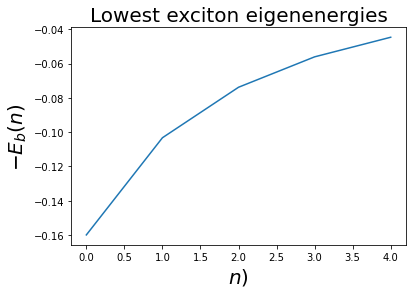

In [7]:
#exciton binding energies
# The effective interlayer exciton mass is calculated as:
# 1/m*=1/me*+1/mh*.
# me* and mh* can be found in c2db,
# but we import them from the default_parameters.py.
ee, ev = hs.get_exciton_binding_energies(eff_mass=get_intermass('H-WSe2', 'H-MoS2'),
                                         e_distr=el_array,
                                         h_distr=hl_array)

print('The interlayer exciton binding energy is: {:0.4f} eV'.format(-ee[0].real))
print('The (first 5) interlayer exciton binding energies are:'.format(-ee[0].real))
for i in range(0,5):
    print('{:0.4f} eV'.format(-ee[i].real))
m=5
plt.plot(range(0,m), ee[:m].real)
plt.xlabel(r'$n$)', fontsize=20)
plt.ylabel(r'$-E_b(n)$', fontsize=20)
plt.title('Lowest exciton eigenenergies',fontsize=20)
plt.show()